In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
class KmeansClustring:
    def __init__(self,k=3,max_iteration=200):
        self.k=k
        self.centroids=None
        self.max_iteration=max_iteration
    

    def fit(self,X):
        self.centroids= np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),#the boundery of the minimum and the maximum value se have
                                          size=(self.k, X.shape[1])#how many centroids we wanna have 
                                          )#generating a random centroid that closer to dimesions we have
        
        for _ in range(self.max_iteration):
            y=[]
            for data_point in X:
                distances=self.euclidean_distance(data_point)#list of numbers
                cluster_num=np.argmin(distances)# to know which centroid is the minumum 
                y.append(cluster_num)
                
            y=np.array(y)
            cluster_indices=[]
            
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y==i))
            cluster_centers=[]
            
            for i,indices in enumerate(cluster_indices):
                if len(indices)==0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])
            
            if np.max(self.centroids-np.array(cluster_centers))<0.0001:
                break
            else:
                self.centroids=np.array(cluster_centers)
        return y
    def euclidean_distance(self,data_point):
    
        return np.sqrt(np.sum((self.centroids-data_point)**2,axis=1))#and output will be of size (n,)
    
    def calculate_inertia(self, data,labels):
        inertia = 0
        for i, centroid in enumerate(self.centroids):
            inertia += np.sum((data[np.array(labels) == i] - centroid)**2)
        return inertia
    def elbow_method(data, max_clusters=10):
        distortions = []

        for k in range(1, max_clusters + 1):
            kmeans_custom = KmeansClustring(k=k, max_iteration=200)
            labels_custom = kmeans_custom.fit(data)
            distortion = kmeans_custom.calculate_inertia(data, labels_custom)
            distortions.append(distortion)

        plt.plot(range(1, max_clusters + 1), distortions, marker='o')
        plt.title('Elbow Method (Custom Implementation)')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Sum of Squared Distances')
        plt.show()
                    


In [25]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
X=df.loc[:,['longitude','latitude','median_income']]
X.head()

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


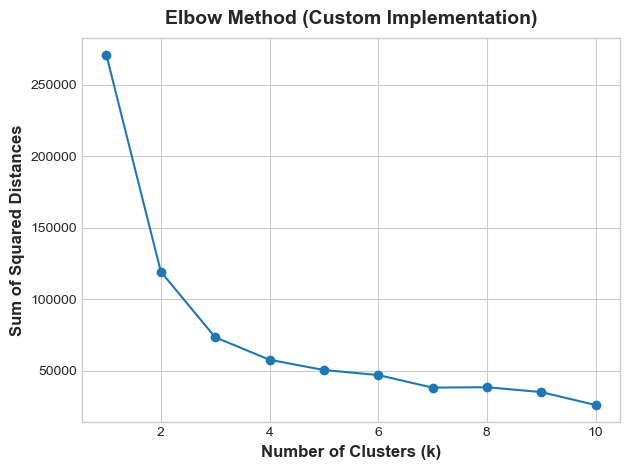

In [36]:
KmeansClustring.elbow_method(X.values)

In [37]:
kmeans = KmeansClustring(k=6)
X["Cluster"] = kmeans.fit(X.values)
X["Cluster"] = X["Cluster"].astype("category")




c:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


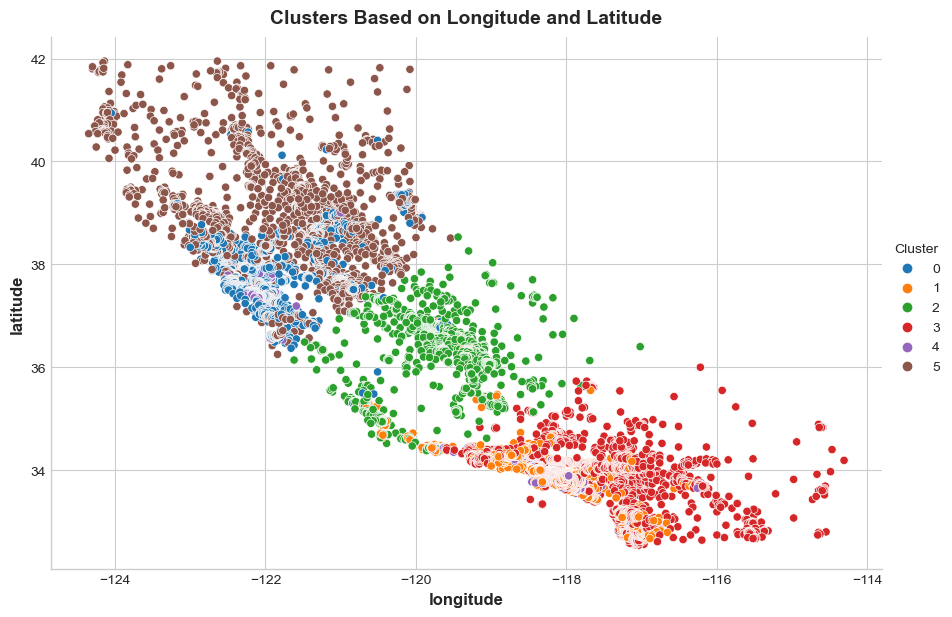

In [38]:
# Plotting the clusters
sns.relplot(x="longitude", y="latitude", hue="Cluster", data=X, height=6, aspect=1.5)
plt.title("Clusters Based on Longitude and Latitude")
plt.show()